# GEM Tutorial

This notebook provides a tutorial for running inference on static images from two modalities in order to detect objects. The *GemLearner* class is a multimodal object detector inspired by DETR [[1]](#detr-paper) object detection algorithm based on the original [DETR implementation](https://github.com/facebookresearch/detr).
The fusion methodologies employed in *GemLearner* are explained in GEM article [[2]](#gem-paper).
It can be used to perform object detection on images (inference) and train GEM object detection models.


#### References
<a name="detr-paper" href="https://ai.facebook.com/research/publications/end-to-end-object-detection-with-transformers">[1]</a> Carion N., Massa F., Synnaeve G., Usunier N., Kirillov A., Zagoruyko S. (2020) End-to-End Object Detection with Transformers. In: Vedaldi A., Bischof H., Brox T., Frahm JM. (eds) Computer Vision – ECCV 2020. ECCV 2020. Lecture Notes in Computer Science, vol 12346. Springer, Cham. [doi](https://doi.org/10.1007/978-3-030-58452-8_13),
[arXiv](https://arxiv.org/abs/2005.12872).

<a name="gem-paper">[2]</a> Mazhar, O., Babuska, R., & Kober, J. (2021). GEM: Glare or Gloom, I Can Still See You - End-to-End Multi-Modal Object Detection. IEEE Robotics and Automation Letters, 6(4), 6321-6328. [doi](https://doi.org/10.1109/LRA.2021.3093871), [arXiv](https://arxiv.org/abs/2102.12319).



First, we need to import the learner and initialize it:

In [1]:
from opendr.perception.object_detection_2d import GemLearner

learner = GemLearner(num_classes=7, device='cpu')

Note that we can alter the device (e.g., 'cpu', 'cuda', etc.).

After creating our model, we need to download pre-trained weights, which are loaded automatically:

In [2]:
learner.download(mode='pretrained_gem')

Model Created


We will also download sample images (RGB and IR) for testing.

In [3]:
import cv2

learner.download(mode='test_data_sample_images')

m1_img = cv2.imread('temp/sample_images/rgb/2021_04_22_21_35_47_852516.jpg')
m2_img = cv2.imread('temp/sample_images/aligned_infra/2021_04_22_21_35_47_852516.jpg')

We can plot the images we just downloaded, to see which objects are in them:

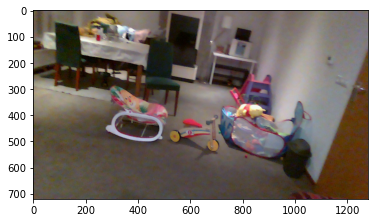

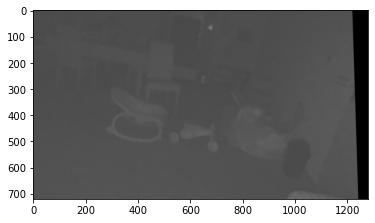

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(cv2.cvtColor(m1_img, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(m2_img, cv2.COLOR_BGR2RGB))

We are now ready to use our model!
The only thing that we have to do is to pass the image through the model.
Note that there are standard data types supported by OpenDR.
However, OpenDR also understands common data types (e.g,. OpenCV images) and automatically converts them into the most
appropriate format:

In [5]:
bounding_box_list, w_sensor1, _ = learner.infer(m1_img, m2_img)

/home/jelle/anaconda3/envs/opendr/lib/python3.6/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630866422/work/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


We can plot the results using a utility function from the DETR module:

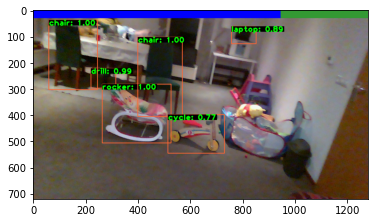

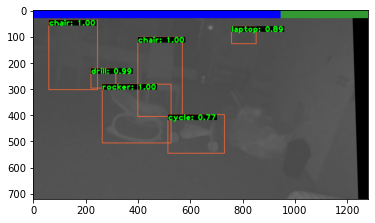

In [6]:
from opendr.perception.object_detection_2d.gem.algorithm.util.draw import draw

img_rgb_annotated = draw(m1_img, bounding_box_list, w_sensor1)
img_ir_annotated = draw(m2_img, bounding_box_list, w_sensor1)

plt.figure()
plt.imshow(cv2.cvtColor(img_rgb_annotated, cv2.COLOR_BGR2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(img_ir_annotated, cv2.COLOR_BGR2RGB))

In the figures above we see the bounding boxes of the detected objects in the RGB and IR image respectively. Also, we can see what modality the detector relies on the most. This is visualised by the blue / green bar at the top of both figures. Fully blue means fully relying on RGB input and fully green means fully relying on IR. In this case, we see that the RGB data is considered to be the most informative, since the blue bar is larger than the green bar.